In [40]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

s = pd.Series([1, 2, 3, 4, 5])
print(s)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [14]:
data = pd.read_csv('data/features.csv')

In [15]:
data.to_csv('new_data.csv', index=False)

In [17]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

/var/folders/0j/85z3mpjd5z7gj2zkz2ty81vc0000gn/T/ipykernel_75401/1562888048.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


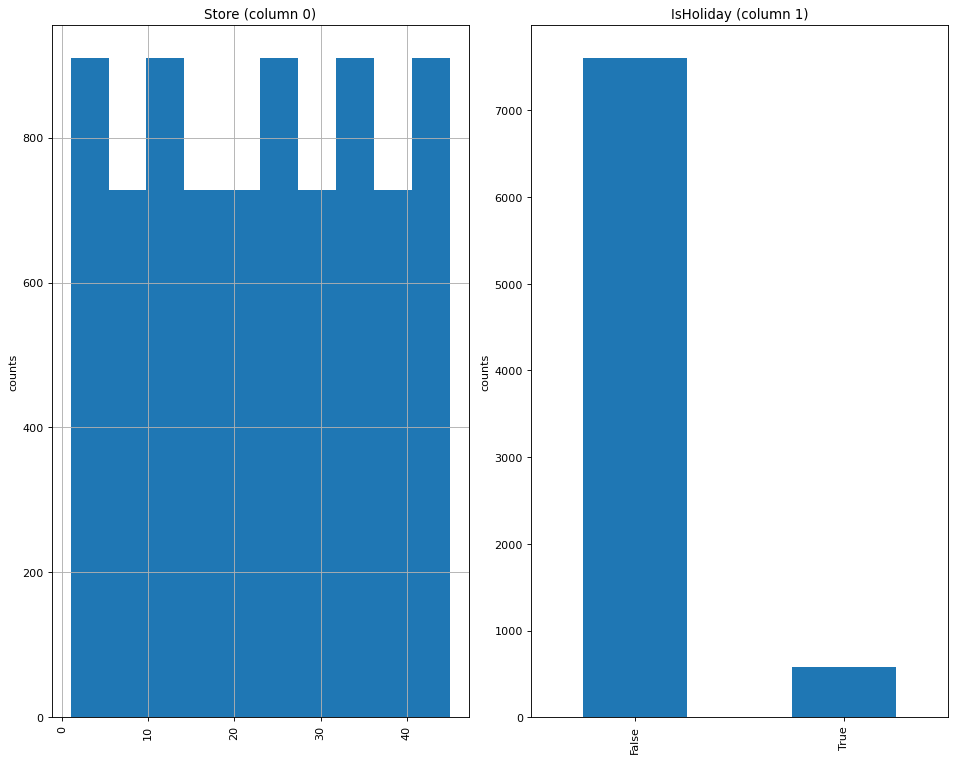

In [18]:
plotPerColumnDistribution(data, 10, 5)

In [21]:
data2=pd.read_csv('data/stores.csv')
data2.dataframeName = 'stores.csv'

In [35]:
na_counts = data.isna().sum()

nan_rows = data[data.isna().any(axis=1)]

sorted_nan = nan_rows.sort_values(by='Date')
distribution = data['MarkDown1'].value_counts(dropna=False)

print("Distribution of values in 'MarkDown1':")
print(distribution)

Distribution of values in 'MarkDown1':
NaN        4158
150.46        2
6510.79       2
4855.31       2
8.62          2
           ... 
4012.81       1
4599.86       1
3679.59       1
2569.12       1
212.02        1
Name: MarkDown1, Length: 4024, dtype: int64


In [36]:
print(nan_rows)

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        

In [37]:
print(data)

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        

In [41]:
df1 = pd.read_csv('data/features.csv')
df2 = pd.read_csv('data/stores.csv')
df3 = pd.read_csv('data/test.csv')
df4 = pd.read_csv('data/train.csv')

In [45]:
print(df4)

        Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]


In [46]:
X_train = df_train[['Store', 'Dept', 'Date','IsHoliday']]  # Features
y_train = df_train['Weekly_Sales']                       # Target

NameError: name 'df_train' is not defined

In [47]:
df_train(df4)

NameError: name 'df_train' is not defined

In [48]:
df_train = pd.read_csv('data/train.csv')

In [49]:
X_train = df_train[['Store', 'Dept', 'Date','IsHoliday']]  # Features
y_train = df_train['Weekly_Sales']                       # Target

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
5      1     1  2010-03-12      21043.39      False
6      1     1  2010-03-19      22136.64      False
7      1     1  2010-03-26      26229.21      False
8      1     1  2010-04-02      57258.43      False
9      1     1  2010-04-09      42960.91      False


<AxesSubplot:xlabel='Thanksgiving', ylabel='Weekly_Sales'>

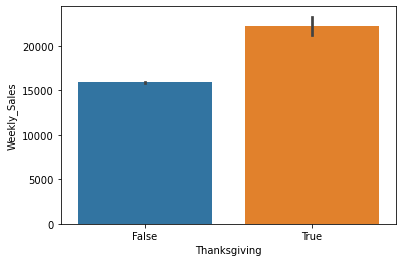

In [105]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns


df_train = pd.read_csv('data/train.csv')

print(df_train.head(10))

df_train.loc[(df_train['Date'] == '2010-11-26')|(df_train['Date'] == '2011-11-25'),'Thanksgiving'] = True
df_train.loc[(df_train['Date'] != '2010-11-26')&(df_train['Date'] != '2011-11-25'),'Thanksgiving'] = False

sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df_train) # Thanksgiving holiday vs not-thanksgiving



In [106]:
# Check data types after conversion
X_train = df_train[['Store', 'Dept','IsHoliday']]  # Features
y_train = df_train['Weekly_Sales']                       # Target

# Step 3: Create and Fit the Model
# Create a Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)
df3 = pd.read_csv('data/test.csv')
print(df3)
df3 = df3.iloc[:, [0, 1, 3]]
print(df3)

predictions = model.predict(df3)
print(predictions)

        Store  Dept        Date  IsHoliday
0           1     1  2012-11-02      False
1           1     1  2012-11-09      False
2           1     1  2012-11-16      False
3           1     1  2012-11-23       True
4           1     1  2012-11-30      False
...       ...   ...         ...        ...
115059     45    98  2013-06-28      False
115060     45    98  2013-07-05      False
115061     45    98  2013-07-12      False
115062     45    98  2013-07-19      False
115063     45    98  2013-07-26      False

[115064 rows x 4 columns]
        Store  Dept  IsHoliday
0           1     1      False
1           1     1      False
2           1     1      False
3           1     1       True
4           1     1      False
...       ...   ...        ...
115059     45    98      False
115060     45    98      False
115061     45    98      False
115062     45    98      False
115063     45    98      False

[115064 rows x 3 columns]
[14408.40727711 14408.40727711 14408.40727711 ... 18316.59